In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import pickle

# import other packages needed for the project below this line

In [3]:
# IMPOTRTANT: set the path where the data files are relative to the Notebook file. 
# You can change the variable pathname below to anything that suits you, For example,
# if your Notebook file is to be run on Google Colab, then you will need to set up
# this variable properly, e.g., 
#       pathname = os.path.join('My Drive', 'CITS5508').
#
# Before submitting your Notebook file to cssubmit, ensure that you change
# this variable back to '.'

# pathname = '.'
pathname = r'D:\JupyterNotebook\Notebook\Lab05\cifar-10-batches-py'

# from google.colab import drive
# drive.mount('/content/gdrive')
# print(os.listdir('.'))

ModuleNotFoundError: No module named 'google.colab'

In [10]:
# function for loading the data_batch_file
def load_pickle_file(filename, path='.'):
    '''
    This function reads the given pickle file and returns a dictionary object.
    '''
    with open(os.path.join(path,filename), 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict  


def load_training(filename_prefix, N_batches, path='.'):
    '''
    This function reads the 5 data batches and returns the X_train and y_train numpy arrays.
    To save memory space, X_train is set to 'float32' (single precision floating point number).
    If this causes an issue, it can be set to 'float64'. y_train is set to uint8. This is
    the same data type as the MNIST dataset, so it should be fine.
    '''
    batch_no = range(1,N_batches+1)  # the batch numbers start at 1
    # Read in the data_batch_ files
    batches = [load_pickle_file(os.path.join(path,filename_prefix+str(b))) for b in batch_no]

    # variable batches is a list containing 5 elements, each of which is a dictionary object

    # compose our X_train and y_train
    # according to the download site, the training set should have 50,000 instances. We caldulate
    # the length from the dictionary that we read in anyway.
    batch_sizes = [len(batches[i][b'labels']) for i in range(N_batches)]
    train_set_size = np.sum(batch_sizes)
    
    X_train = np.zeros((train_set_size, width, height, Nchannels), dtype='float32')
    y_train = np.zeros(train_set_size).astype('uint8')
    loc = 0
    for i in range(N_batches):
        X_train[loc:(loc+batch_sizes[i]),:,:,:] = np.swapaxes(np.swapaxes(
            np.reshape(batches[i][b'data'], (-1,Nchannels,width,height)), 1, 3), 1, 2) / 255.0
        y_train[loc:(loc+batch_sizes[i])] = batches[i][b'labels']
        loc += batch_sizes[i]
    return X_train, y_train


def load_testing(filename, path='.'):
    '''
    This function reads the test_batch and returns X_test and y_test.
    To save memory space, X_test is set to 'float32' (single precision floating point number).
    If this causes an issue, it can be set to 'float64'. y_test is set to uint8. This is
    the same data type as the MNIST dataset, so it should be fine.
    '''
    # now read test_batch and construct the test set
    test_dict = load_pickle_file(filename, path=path)
    
    X_test = np.swapaxes(np.swapaxes(
        np.reshape(test_dict[b'data'], (-1,Nchannels,width,height)), 1, 3), 1, 2) / 255.0
    X_test = X_test.astype('float32')
    y_test = np.array(test_dict[b'labels'], dtype='uint8')
    return X_test, y_test

In [11]:
c=3
def test(a,b):
    print(a,b,c)
test(1,2)

1 2 3


In [12]:
# According to the download site, the training set is split into five batches stored in 5 files,
# each colour image has dimension equal to 32 x 32 x 3, and there are 10 classes.
width, height, Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

N_batches = 5  
train_filename_prefix = 'data_batch_'
test_filename = 'test_batch'

X_train, y_train = load_training(train_filename_prefix, N_batches, path=pathname)
X_test, y_test = load_testing(test_filename, path=pathname)

train_set_size = X_train.shape[0]
test_set_size = X_test.shape[0]
print('Number of training instances:', train_set_size)
print('Number of test instances:    ', test_set_size)

Number of training instances: 50000
Number of test instances:     10000


In [13]:
len(X_train[0]), len(X_train[0][0]), X_train[0][0].shape

(32, 32, (32, 3))

In [16]:
y_train[0]

6

In [15]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

### Everything from this cell onward can be removed

The first 20 instances of the CIFAR-10 training set


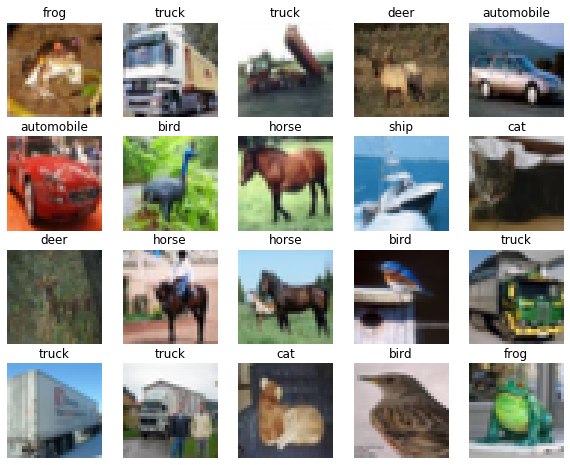

In [9]:
print('The first 20 instances of the CIFAR-10 training set')
plt.figure(figsize=(10, 8))
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    ax.set_title(class_names[y_train[i]])
plt.show()

In [29]:
# X_train, y_train, X_test, and y_test are all numpy arrays
print('X_train.shape =', X_train.shape, 'data type:', X_train.dtype)
print('y_train.shape =', y_train.shape, 'data type:', y_train.dtype)
print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_train.shape = (50000, 32, 32, 3) data type: float32
y_train.shape = (50000,) data type: uint8
X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


In [30]:
X_valid, X_training = X_train[:5000], X_train[5000:]
y_valid, y_training = y_train[:5000], y_train[5000:]

In [31]:
print('X_valid.shape =', X_valid.shape, 'data type:', X_valid.dtype)
print('X_training.shape =', X_training.shape, 'data type:', X_training.dtype)
print('y_valid.shape =', y_valid.shape, 'data type:', y_valid.dtype)
print('y_training.shape =', y_training.shape, 'data type:', y_training.dtype)

X_valid.shape = (5000, 32, 32, 3) data type: float32
X_training.shape = (45000, 32, 32, 3) data type: float32
y_valid.shape = (5000,) data type: uint8
y_training.shape = (45000,) data type: uint8


In [32]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [33]:
y_train[0]

6

In [34]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()
# the first layer of neural network
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
# the first hidden layer
model.add(keras.layers.Dense(300, activation="relu",
                             kernel_initializer="random_uniform",
                             bias_initializer="zeros"))
# the second hidden layer
model.add(keras.layers.Dense(100, activation="relu",
                             kernel_initializer="random_uniform",
                             bias_initializer="zeros"))
# output layer
model.add(keras.layers.Dense(10, activation="softmax",
                             kernel_initializer="random_uniform",
                             bias_initializer="zeros"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [36]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape

(3072, 300)

In [37]:
weights

array([[ 0.01276771,  0.01732979, -0.02809603, ..., -0.04353833,
         0.03791643, -0.04625623],
       [ 0.02678353,  0.00518637,  0.0404712 , ...,  0.02403556,
        -0.04961102,  0.04902655],
       [-0.02945654, -0.01066675,  0.04132317, ..., -0.01723268,
         0.01526545,  0.02756468],
       ...,
       [ 0.01665639, -0.03740298,  0.03473205, ...,  0.01768884,
        -0.00896531, -0.03900539],
       [ 0.04638367, -0.01271643, -0.00793133, ...,  0.01084816,
         0.02648065, -0.02821006],
       [-0.03057027, -0.04126662,  0.01634118, ...,  0.00358578,
        -0.04131874,  0.00783892]], dtype=float32)

In [38]:
biases.shape

(300,)

In [39]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [40]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [41]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=sgd,
             metrics=["accuracy"])

In [42]:
# Training and evaluating the model
history = model.fit(X_training, y_training, 
                    epochs=10, validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 13s 290us/sample - loss: 2.0772 - accuracy: 0.2416 - val_loss: 1.9092 - val_accuracy: 0.3094
Epoch 2/10
45000/45000 [==============================] - 11s 246us/sample - loss: 1.8544 - accuracy: 0.3370 - val_loss: 1.8427 - val_accuracy: 0.3398
Epoch 3/10
45000/45000 [==============================] - 11s 241us/sample - loss: 1.7524 - accuracy: 0.3742 - val_loss: 1.7495 - val_accuracy: 0.3646
Epoch 4/10
45000/45000 [==============================] - 11s 240us/sample - loss: 1.6838 - accuracy: 0.3996 - val_loss: 1.7467 - val_accuracy: 0.3690
Epoch 5/10
45000/45000 [==============================] - 11s 235us/sample - loss: 1.6284 - accuracy: 0.4188 - val_loss: 1.6771 - val_accuracy: 0.3790
Epoch 6/10
45000/45000 [==============================] - 11s 236us/sample - loss: 1.5826 - accuracy: 0.4379 - val_loss: 1.6993 - val_accuracy: 0.3828
Epoch 7/10
45000/45000 [=====================

In [43]:
unique, counts = np.unique(y_training, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4495, 4540, 4481, 4514, 4481, 4512, 4481, 4514, 4480, 4502],
       dtype=int64))

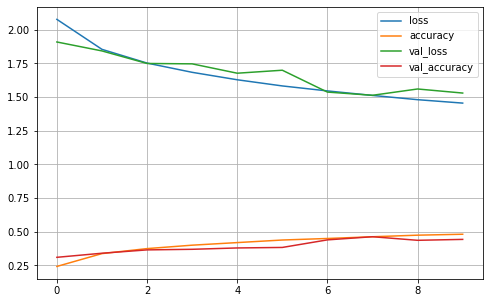

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim()
plt.show()

In [45]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5223452640533448, 0.4503]

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.04, 0.02, 0.08, 0.34, 0.02, 0.22, 0.24, 0.  , 0.03, 0.01],
       [0.03, 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.65],
       [0.22, 0.08, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.42, 0.25]],
      dtype=float32)

In [47]:
y_pred = model.predict_classes(X_new)
y_pred

array([3, 9, 8], dtype=int64)

In [48]:
np.array(class_names)[y_pred]

array(['cat', 'truck', 'ship'], dtype='<U10')

The first 3 instances of the CIFAR-10 test set


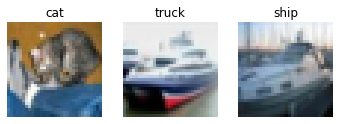

In [49]:
# display some of the images to ensure that we have read in the data correctly
print('The first 3 instances of the CIFAR-10 test set')
plt.figure(figsize=(10, 8))
for i in range(3):
    ax = plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    ax.set_title(class_names[y_pred[i]])
plt.show()